# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
df = pd.read_csv('DATA/matches2020.csv')
df

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,0,ESPORTSTMNT03/1241318,KeSPA,SANDBOX Gaming,T1,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,1,ESPORTSTMNT03/1241322,KeSPA,T1,SANDBOX Gaming,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,3,ESPORTSTMNT03/1241328,KeSPA,T1,SANDBOX Gaming,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,4,ESPORTSTMNT03/1241386,KeSPA,DRX,Afreeca Freecs,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,5607,ESPORTSTMNT03/1433741,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,5608,ESPORTSTMNT03/1433748,LCS,FlyQuest,Team SoloMid,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,5609,ESPORTSTMNT03/1433749,LCS,Team SoloMid,FlyQuest,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,5610,ESPORTSTMNT03/1433751,LCS,FlyQuest,Team SoloMid,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


In [2]:
df.dtypes
df = df.drop(columns=["Unnamed: 0","gameid","league","blueteam","redteam"])
df.count()

bluetop        5612
bluejungle     5612
bluemid        5612
blueadc        5612
bluesupport    5612
redtop         5612
redjungle      5612
redmid         5612
redadc         5612
redsupport     5612
result         5612
dtype: int64

In [3]:
df = df.dropna()
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0
...,...,...,...,...,...,...,...,...,...,...,...
5607,Ornn,Graves,Viktor,Caitlyn,Lux,Camille,Sett,Zilean,Ashe,Karma,0
5608,Ornn,Graves,Azir,Caitlyn,Pantheon,Jax,Sett,TwistedFate,Ashe,Bard,0
5609,Jayce,Sett,TwistedFate,Ashe,Bard,Gangplank,Hecarim,Orianna,Senna,Nautilus,0
5610,Ornn,Volibear,Azir,Caitlyn,Pantheon,Jayce,Sett,Syndra,Ashe,Morgana,1


### Load Hashmap

In [4]:
df_c = pd.read_csv('DATA/champion_stats.csv')

champkeys = {}

for i in range(len(df_c["key"])):
    champkeys[df_c["key"][i]] = df_c["id"][i]

champkeys

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 523: 'Aphelios',
 22: 'Ashe',
 136: 'AurelionSol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: 'Chogath',
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 119: 'Draven',
 36: 'DrMundo',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'JarvanIV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 145: 'Kaisa',
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: 'Khazix',
 203: 'Kindred',
 240: 'Kled',
 96: 'KogMaw',
 7: 'Leblanc',
 64: 'LeeSin',
 89: 'Leona',
 876: 'Lilli

### Ranked Data

In [109]:
print(md['participants'][0])

[{'participantId': 1, 'teamId': 100, 'championId': 7, 'spell1Id': 1, 'spell2Id': 4, 'stats': {'participantId': 1, 'win': False, 'item0': 2033, 'item1': 3285, 'item2': 3108, 'item3': 1082, 'item4': 3020, 'item5': 2055, 'item6': 3364, 'kills': 3, 'deaths': 6, 'assists': 3, 'largestKillingSpree': 2, 'largestMultiKill': 1, 'killingSprees': 1, 'longestTimeSpentLiving': 564, 'doubleKills': 0, 'tripleKills': 0, 'quadraKills': 0, 'pentaKills': 0, 'unrealKills': 0, 'totalDamageDealt': 71369, 'magicDamageDealt': 56332, 'physicalDamageDealt': 13037, 'trueDamageDealt': 1999, 'largestCriticalStrike': 0, 'totalDamageDealtToChampions': 10844, 'magicDamageDealtToChampions': 8926, 'physicalDamageDealtToChampions': 1918, 'trueDamageDealtToChampions': 0, 'totalHeal': 4006, 'totalUnitsHealed': 1, 'damageSelfMitigated': 6742, 'damageDealtToObjectives': 1055, 'damageDealtToTurrets': 1008, 'visionScore': 14, 'timeCCingOthers': 12, 'totalDamageTaken': 17255, 'magicalDamageTaken': 5282, 'physicalDamageTaken': 

In [5]:
md = pd.read_csv('DATA/match_data_version1.csv')
md

,Unnamed: 0,gameCreation,gameDuration,gameId,gameMode,gameType,gameVersion,mapId,participantIdentities,participants,platformId,queueId,seasonId,status.message,status.status_code
0,0,1.585155e+12,1323.0,4.247263e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
1,1,1.585152e+12,1317.0,4.247156e+09,CLASSIC,MATCHED_GAME,10.6.314.4405,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
2,2,1.585059e+12,932.0,4.243963e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
3,3,1.584978e+12,2098.0,4.241678e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
4,4,1.584973e+12,2344.0,4.241539e+09,CLASSIC,MATCHED_GAME,10.6.313.8894,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108824,0,1.579163e+12,1029.0,4.088497e+09,URF,MATCHED_GAME,10.1.303.9385,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN
108825,0,1.580823e+12,1544.0,4.130964e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108826,0,1.580382e+12,2090.0,4.119954e+09,CLASSIC,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,420.0,13.0,NaN,NaN
108827,0,1.580805e+12,1382.0,4.130440e+09,URF,MATCHED_GAME,10.2.305.4739,11.0,"[{'participantId': 1, 'player': {'platformId':...","[{'participantId': 1, 'teamId': 100, 'champion...",KR,900.0,13.0,NaN,NaN


In [6]:
#print(md["participants"][0])

df_r = df.copy()
for i in range(len(md["gameMode"])):
    if(i%1000 == 0):
        print(i)
        
    if(md["gameMode"][i] == "CLASSIC"):
        
        # get the champions
        next_index = len(df['bluetop'])
        #print(next_index)
        string = md["participants"][i]
        loc = 0
        loc_p = 0
        loc_l = 0
        loc_w = 0
        
        bt_f = False
        bm_f = False
        bs_f = False
        bb_f = False
        bj_f = False
        
        rt_f = False
        rm_f = False
        rs_f = False
        rb_f = False
        rj_f = False
        
        for p in range(10):
            
            #get win
            if(p == 0):
                loc_w = string.find("win", (loc_w+1), len(string)-1)
                won = string[loc_w+6:loc_w+10]
                bwin = 0
                if(won.lower() == "true"):
                    bwin = 1
            
            #get champ id
            loc = string.find("championId", (loc+1), len(string)-1)
            space = string.find(",", (loc+13), len(string)-1)
            try:
                champid = int(string[loc+13:space])
            except ValueError as err:
                print("err")
            
            #get position
            loc_p = string.find("role", (loc_p+1), len(string)-1)
            support = string[loc_p+12:loc_p+19]
            loc_l = string.find("lane", (loc_l+1), len(string)-1)
            lane = string[loc_l+8]
            #print(lane)
            #champid = string[loc+13:space]
            
            if(p < 5 and support == "SUPPORT"):
                df.at[next_index, "bluesupport"] = champkeys[champid]
                #print("bS: ", champkeys[champid])
                
            elif(p < 5 and support != "SUPPORT"):
                if(p < 5 and lane == "B"):
                    df.at[next_index, "blueadc"] = champkeys[champid]
                    #print("bB: ", champkeys[champid])
                elif(p < 5 and lane == "J"):
                    df.at[next_index, "bluejungle"] = champkeys[champid]
                    #print("bJ: ", champkeys[champid])
                elif(p < 5 and lane == "M"):
                    df.at[next_index, "bluemid"] = champkeys[champid]
                    #print("bM: ", champkeys[champid])
                elif(p < 5 and lane == "T"):
                    df.at[next_index, "bluetop"] = champkeys[champid]
                    #print("bT: ", champkeys[champid])
                
            if(p >= 5 and support == "SUPPORT"):
                df.at[next_index, "redsupport"] = champkeys[champid]
                #print("rS: ", champkeys[champid])
                
            elif(p >= 5 and support != "SUPPORT"):
                if(p >= 5 and lane == "B"):
                    df.at[next_index, "redadc"] = champkeys[champid]
                    #print("rB: ", champkeys[champid])
                elif(p >= 5 and lane == "J"):
                    df.at[next_index, "redjungle"] = champkeys[champid]
                    #print("rJ: ", champkeys[champid])
                elif(p >= 5 and lane == "M"):
                    df.at[next_index, "redmid"] = champkeys[champid]
                    #print("rM: ", champkeys[champid])
                elif(p >= 5 and lane == "T"):
                    df.at[next_index, "redtop"] = champkeys[champid]
                    #print("rT: ", champkeys[champid])
                
            #print(next_index)
                
            if(p == 0):
                df.at[next_index, "result"] = bwin
                #print("result: ", bwin)
            
        
        #break
            
            
    
#print(md["participants"][0])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
err
75000
76000
77000
78000
err
79000
80000
err
81000
82000
83000
84000
85000
86000
err
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
err
103000
104000
105000
106000
err
107000
108000


In [7]:
print(len(df["bluetop"]))
df = df.dropna()
print(len(df["bluetop"]))
df

98469
40432


,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
98459,Sett,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
98462,Garen,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


### Unique Blue Teams

In [8]:

bluet = df[['bluetop','bluejungle','bluemid','blueadc','bluesupport']]
bluet

redt = df[['redtop','redjungle','redmid','redadc','redsupport']]
redt = redt.rename(columns={'redtop': 'bluetop', 'redjungle': 'bluejungle','redmid':'bluemid','redadc':'blueadc','redsupport':'bluesupport'})
allt = redt.append(bluet)
allt.groupby(['bluetop','bluejungle','bluemid','blueadc','bluesupport']).ngroups
allt

,bluetop,bluejungle,bluemid,blueadc,bluesupport
0,Aatrox,Gragas,Mordekaiser,Xayah,Rakan
1,Aatrox,Elise,Qiyana,Varus,TahmKench
2,Aatrox,Sejuani,Azir,MissFortune,Nautilus
3,Quinn,Olaf,Orianna,MissFortune,Leona
4,Renekton,Elise,Velkoz,Varus,Braum
...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi
98459,Sett,RekSai,Katarina,Xayah,Pyke
98462,Garen,LeeSin,Leblanc,Aphelios,Bard
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona


### Unique Red Teams

In [9]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

39901

In [10]:
df.groupby(['redtop','redjungle','redmid','redadc','redsupport']).ngroups

39901

### Unique Champions

In [11]:
topb = df['bluetop']
topr = df['redtop']
midb = df['bluemid']
midr = df['redmid']
jngb = df['bluejungle']
jngr = df['redjungle']
adcb = df['blueadc']
adcr = df['redadc']
supb = df['bluesupport']
supr = df['redsupport']
uni = df['redtop'].append(topb)
uni = uni.append(midb)
uni = uni.append(midr)
uni = uni.append(jngb)
uni = uni.append(jngr)
uni = uni.append(adcb)
uni = uni.append(adcr)
uni = uni.append(supb)
uni = uni.append(supr)
uni.nunique()
uni = uni.drop_duplicates()
uni

0          Aatrox
3           Quinn
4        Renekton
5        Vladimir
7          Irelia
           ...   
70858        Zyra
72171      Xerath
79074       Yuumi
92712      RekSai
41894       Braum
Length: 149, dtype: object

### Win Rate by Champion

In [12]:
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...
98452,Darius,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
98459,Sett,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
98462,Garen,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
98463,Kassadin,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [13]:
bluewins = df.query('result == 1 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [14]:
redwins = df.query('result == 0 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [15]:
bluelosses = df.query('result == 0 & (bluetop == "Rumble" | bluejungle == "Rumble" | bluemid == "Rumble" | blueadc == "Rumble" | bluesupport == "Rumble")').count()

In [16]:
redlosses = df.query('result == 1 & (redtop == "Rumble" | redjungle == "Rumble" | redmid == "Rumble" | redadc == "Rumble" | redsupport == "Rumble")').count()

In [17]:
winrate = (bluewins+redwins)/(bluelosses+redlosses)

In [18]:
champs = []
winrates = []
totalplayed = []
for item in uni:
    champs.append(item)
    bluewins = df.query('result == 1 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redwins = df.query('result == 0 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    bluelosses = df.query('result == 0 & (bluetop == "'+item+'" | bluejungle == "'+item+'" | bluemid == "'+item+'" | blueadc == "'+item+'" | bluesupport == "'+item+'")').count()
    redlosses = df.query('result == 1 & (redtop == "'+item+'" | redjungle == "'+item+'" | redmid == "'+item+'" | redadc == "'+item+'" | redsupport == "'+item+'")').count()
    winrate = (bluewins+redwins)/(bluelosses+redlosses+bluewins+redwins)[0]
    winrates.append(winrate[0])
    totalplayed.append((bluelosses+redlosses+bluewins+redwins)[0])
    
print(winrates, totalplayed)



[0.4785581106277191, 0.5154929577464789, 0.49609862671660426, 0.52530199151159, 0.4595871238628412, 0.5028121484814398, 0.4986449864498645, 0.5, 0.4922784509384652, 0.5006310475389146, 0.512221618685497, 0.47765141496958474, 0.5223710458820177, 0.5144948755490483, 0.4828767123287671, 0.5096153846153846, 0.5003872966692486, 0.5114422565194252, 0.5150442477876106, 0.5033557046979866, 0.5285350781533987, 0.4998401704848162, 0.49654491609081935, 0.5055350553505535, 0.5055702917771884, 0.4904361132364193, 0.47395517867958814, 0.49077868852459017, 0.4672566371681416, 0.48385353330631, 0.48693778615674654, 0.4964493221433183, 0.49295774647887325, 0.5116586009678838, 0.4829700272479564, 0.4762924441725298, 0.5095513105286539, 0.46944151738672285, 0.5189718482252142, 0.49458483754512633, 0.49130434782608695, 0.48633879781420764, 0.48269581056466304, 0.5341426403641881, 0.48261474269819193, 0.4953560371517028, 0.49501246882793015, 0.44612068965517243, 0.5201361315938741, 0.5036344755970924, 0.52

In [19]:
ch_wr_gp = (champs, winrates, totalplayed)
d = {'champ': champs, 'winrate': winrates, 'totalplayed':totalplayed}
new = pd.DataFrame(data=d)
new = new.sort_values('totalplayed')

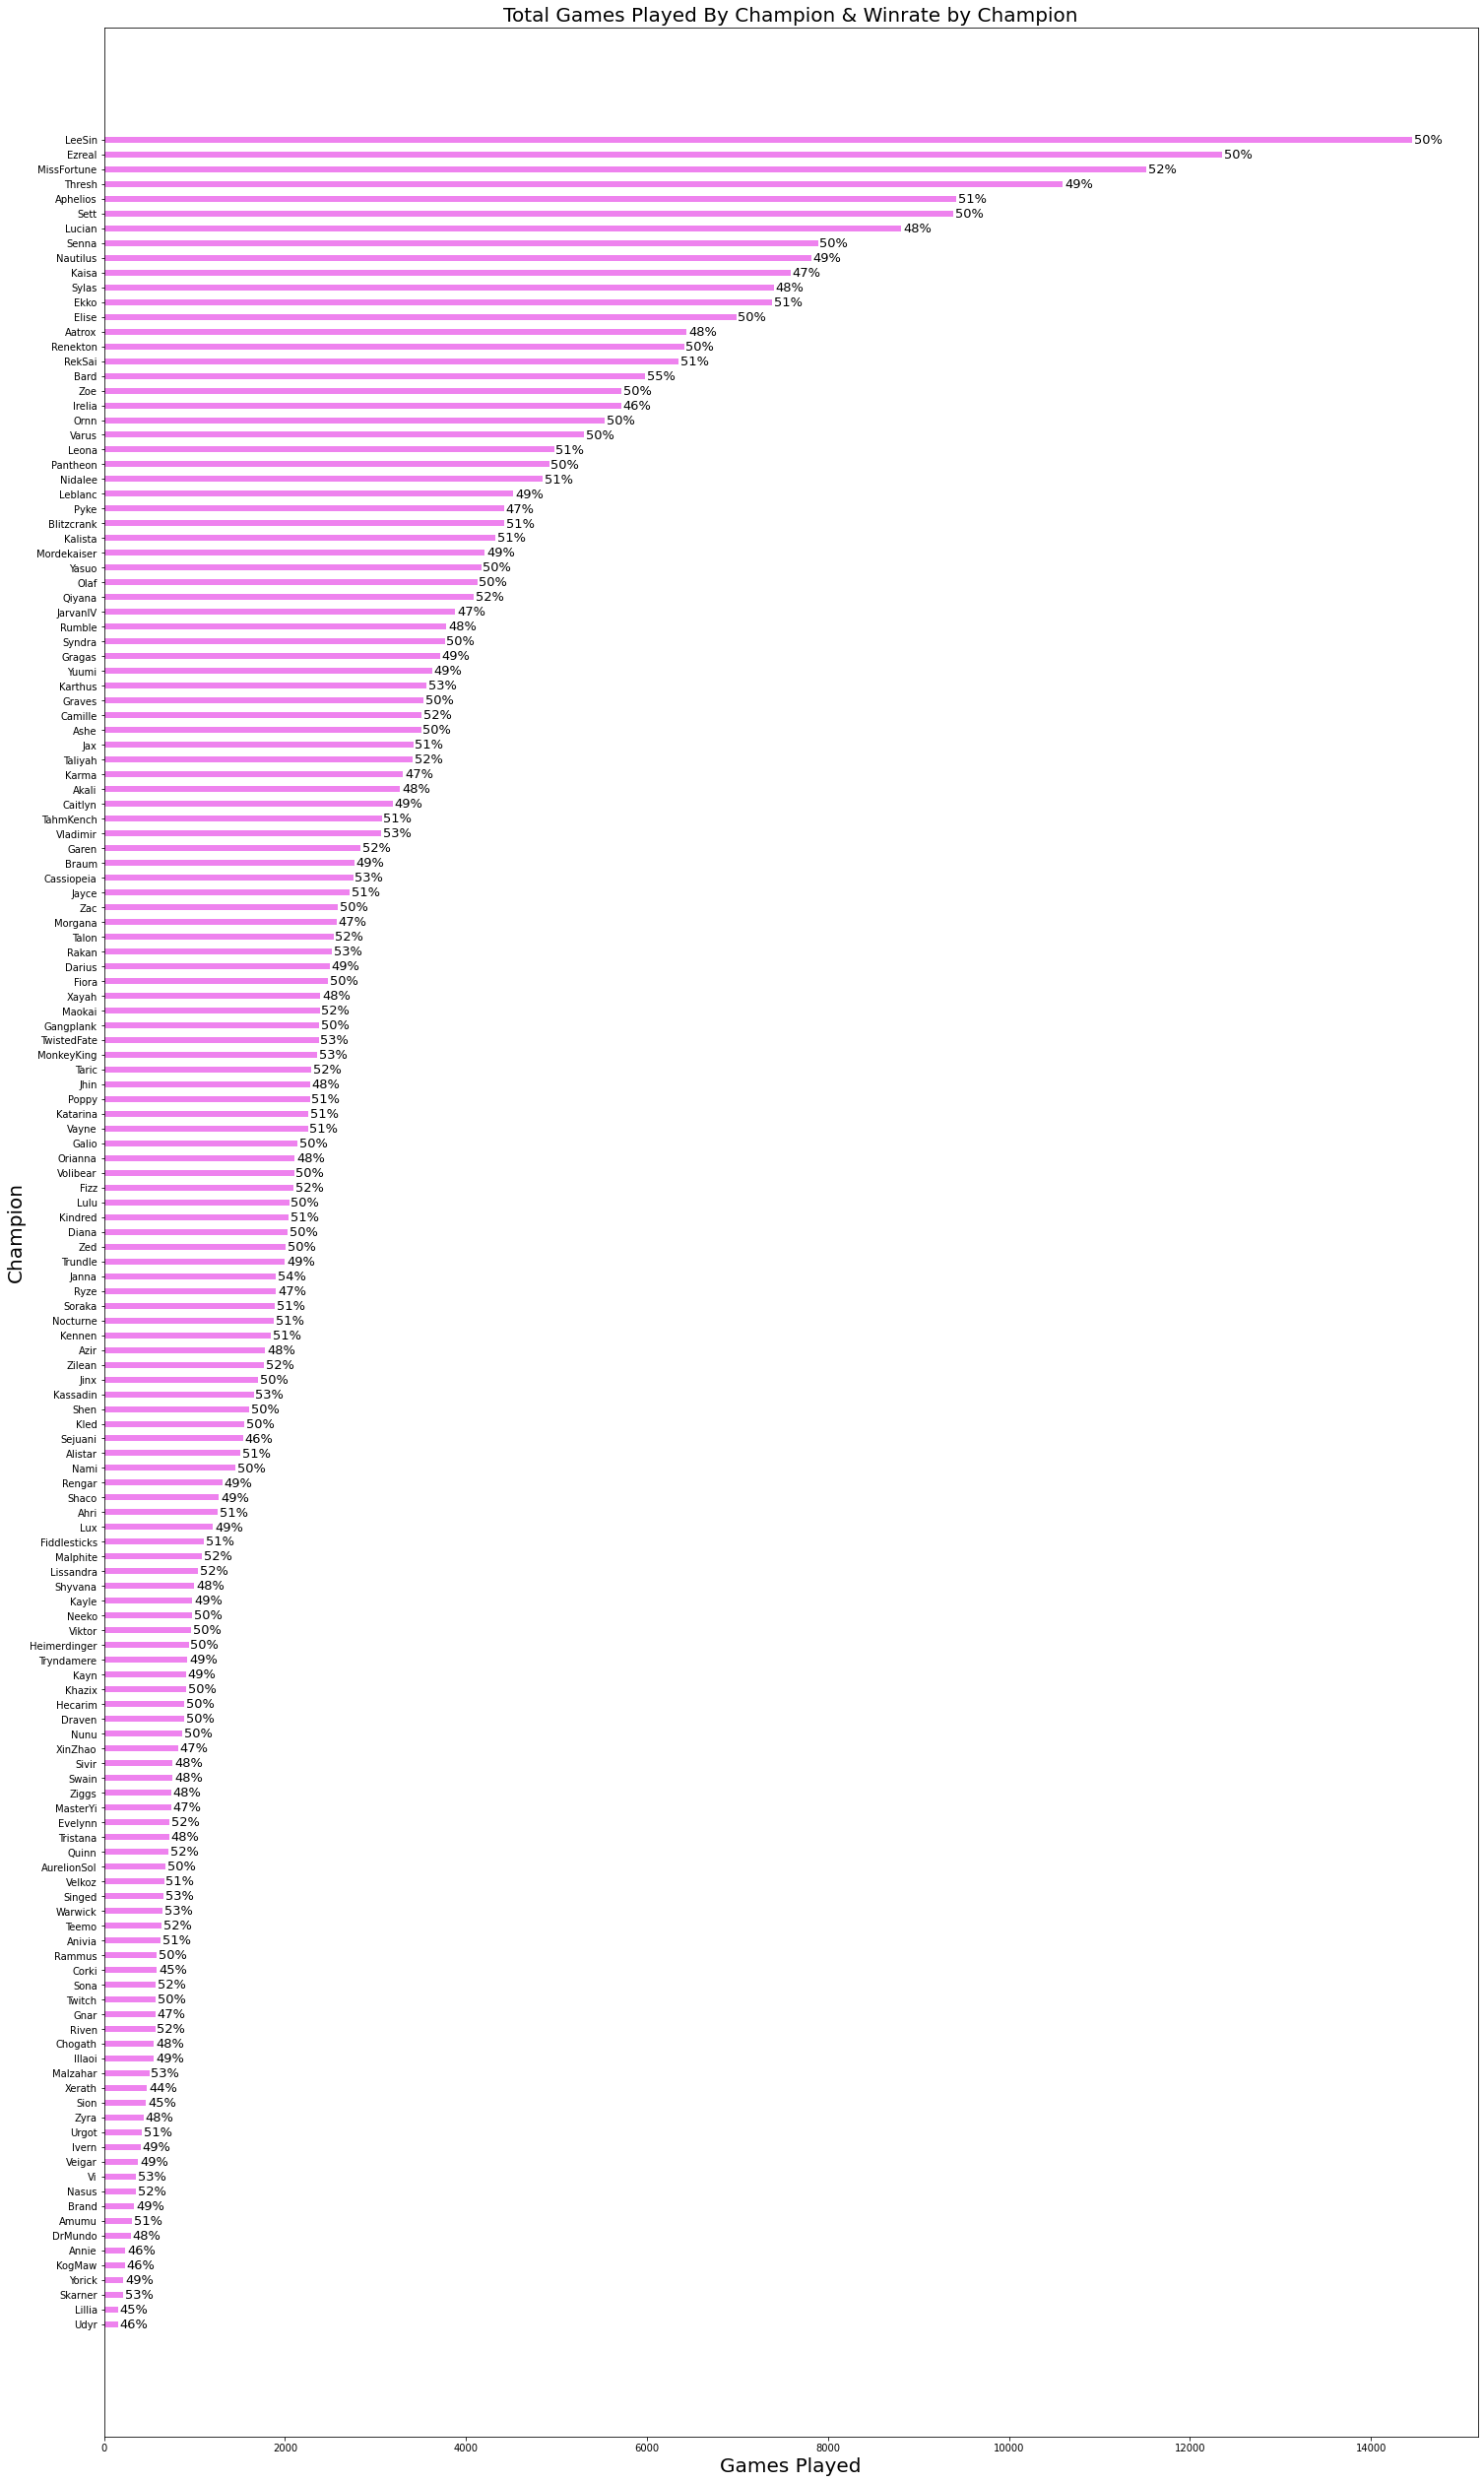

In [20]:


ind = np.arange(len(new['champ']))  # the x locations for the groups
width = .4  # the width of the bars

plt.figure(figsize=(25,45))
plt.barh(ind, new['totalplayed'], width,
                color='violet', label='Games Played')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Champion', size=20)
plt.xlabel('Games Played', size=20)
plt.title('Total Games Played By Champion & Winrate by Champion', size=20)
plt.yticks(ind, new['champ'])

for i, (p, pr) in enumerate(zip(new["winrate"], new["totalplayed"])):
    plt.text(s=('%.0f' % (p*100))+'%', x=(pr+20), y=i, color="black", verticalalignment="center", size=13)
    #plt.text(s=str(round(pr,0))+"%", x=pr-5, y=i, color="black",
             #verticalalignment="center", horizontalalignment="left", size=10)

plt.show()

### One Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
df = df.reset_index()
df = df.drop(axis=1, labels=['index'])
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,Rumble,Elise,Qiyana,MissFortune,Nautilus,Aatrox,Gragas,Mordekaiser,Xayah,Rakan,1.0
1,Jayce,JarvanIV,Orianna,MissFortune,Nautilus,Aatrox,Elise,Qiyana,Varus,TahmKench,0.0
2,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1.0
3,Pantheon,Elise,Nautilus,Xayah,Rakan,Quinn,Olaf,Orianna,MissFortune,Leona,0.0
4,Mordekaiser,JarvanIV,Ryze,Xayah,Rakan,Renekton,Elise,Velkoz,Varus,Braum,0.0
...,...,...,...,...,...,...,...,...,...,...,...
40427,Darius,JarvanIV,Katarina,Vladimir,Yuumi,Mordekaiser,LeeSin,Zed,MissFortune,Senna,0.0
40428,Sett,RekSai,Katarina,Xayah,Pyke,Soraka,Olaf,Fizz,Lucian,Senna,1.0
40429,Garen,LeeSin,Leblanc,Aphelios,Bard,Garen,Ekko,Camille,Yasuo,Thresh,0.0
40430,Kassadin,LeeSin,Leblanc,Ezreal,Leona,Camille,Taliyah,Talon,MissFortune,Nautilus,0.0


In [23]:
import tensorflow as tf
num_champions=150
champs_ = []
dic = {}
j=1
for col in df:
    if col != 'result':
        print(col)
        for i in range(len(df['bluetop'])):
            if(df[col][i] not in champs_):
                champs_.append(df[col][i])
                dic[df[col][i]] = j
                j = j + 1
                #print(df[col][i], j)
            

champs_.pop()
champs_.pop()
print(champs_)

bluetop
bluejungle
bluemid
blueadc
bluesupport
redtop
redjungle
redmid
redadc
redsupport
['Rumble', 'Jayce', 'Renekton', 'Pantheon', 'Mordekaiser', 'Kennen', 'Camille', 'Aatrox', 'Ornn', 'Akali', 'Leblanc', 'Fiora', 'Sett', 'Gangplank', 'Vladimir', 'Irelia', 'Malphite', 'Swain', 'Gnar', 'Lucian', 'Sion', 'Poppy', 'Hecarim', 'Soraka', 'Kayle', 'Illaoi', 'Shen', 'Kled', 'Urgot', 'Chogath', 'Viktor', 'Sylas', 'Tristana', 'Sona', 'Quinn', 'Cassiopeia', 'Singed', 'Gragas', 'Olaf', 'Ryze', 'Darius', 'Zac', 'Maokai', 'Yorick', 'Karma', 'Nocturne', 'Yasuo', 'Kalista', 'Qiyana', 'Neeko', 'MonkeyKing', 'JarvanIV', 'Bard', 'Graves', 'Syndra', 'Tryndamere', 'Vayne', 'Zilean', 'Zoe', 'LeeSin', 'Jax', 'Riven', 'Nautilus', 'Janna', 'Fiddlesticks', 'Volibear', 'Shyvana', 'Rengar', 'Galio', 'DrMundo', 'Lillia', 'Lulu', 'Skarner', 'Nasus', 'Garen', 'Heimerdinger', 'Lissandra', 'TwistedFate', 'Kassadin', 'Ekko', 'Aphelios', 'Karthus', 'Senna', 'Nidalee', 'Teemo', 'Taric', 'Talon', 'Warwick', 'Trundle', '

In [36]:
dic

{'Rumble': 1,
 'Jayce': 2,
 'Renekton': 3,
 'Pantheon': 4,
 'Mordekaiser': 5,
 'Kennen': 6,
 'Camille': 7,
 'Aatrox': 8,
 'Ornn': 9,
 'Akali': 10,
 'Leblanc': 11,
 'Fiora': 12,
 'Sett': 13,
 'Gangplank': 14,
 'Vladimir': 15,
 'Irelia': 16,
 'Malphite': 17,
 'Swain': 18,
 'Gnar': 19,
 'Lucian': 20,
 'Sion': 21,
 'Poppy': 22,
 'Hecarim': 23,
 'Soraka': 24,
 'Kayle': 25,
 'Illaoi': 26,
 'Shen': 27,
 'Kled': 28,
 'Urgot': 29,
 'Chogath': 30,
 'Viktor': 31,
 'Sylas': 32,
 'Tristana': 33,
 'Sona': 34,
 'Quinn': 35,
 'Cassiopeia': 36,
 'Singed': 37,
 'Gragas': 38,
 'Olaf': 39,
 'Ryze': 40,
 'Darius': 41,
 'Zac': 42,
 'Maokai': 43,
 'Yorick': 44,
 'Karma': 45,
 'Nocturne': 46,
 'Yasuo': 47,
 'Kalista': 48,
 'Qiyana': 49,
 'Neeko': 50,
 'MonkeyKing': 51,
 'JarvanIV': 52,
 'Bard': 53,
 'Graves': 54,
 'Syndra': 55,
 'Tryndamere': 56,
 'Vayne': 57,
 'Zilean': 58,
 'Zoe': 59,
 'LeeSin': 60,
 'Jax': 61,
 'Riven': 62,
 'Nautilus': 63,
 'Janna': 64,
 'Fiddlesticks': 65,
 'Volibear': 66,
 'Shyvana': 67

In [24]:
for col in df:
    if col != 'result':
        for i in range(len(df['bluetop'])):
            #print(df[col][i])
            df.at[i, col] = dic[df[col][i]]
            
df

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
0,1,116,49,118,63,8,38,5,132,135,1.0
1,2,52,102,118,63,8,116,49,144,124,0.0
2,3,114,5,132,135,8,101,112,118,63,1.0
3,4,116,63,132,135,35,39,102,118,134,0.0
4,5,52,40,132,135,3,116,129,144,148,0.0
...,...,...,...,...,...,...,...,...,...,...,...
40427,41,52,97,15,143,5,60,108,118,83,0.0
40428,13,114,97,132,99,24,39,90,20,83,1.0
40429,75,60,11,81,53,75,80,7,47,130,0.0
40430,79,60,11,131,134,7,128,87,118,63,0.0


In [96]:
X = df.copy()

### Randomize SHuffle

In [97]:
X=X.sample(frac=1)
X

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
8385,5,116,49,144,124,32,60,6,118,143,0.0
15732,12,51,92,137,45,32,54,131,144,133,1.0
31548,68,116,90,124,83,43,65,87,139,27,0.0
32786,1,84,7,118,124,4,116,49,144,99,0.0
28617,8,95,98,131,130,22,82,108,111,120,1.0
...,...,...,...,...,...,...,...,...,...,...,...
27474,89,65,16,57,148,47,84,3,118,53,0.0
1092,8,116,144,118,124,3,60,59,141,130,1.0
33020,2,95,98,131,133,15,60,94,111,143,0.0
15190,12,54,4,48,13,28,80,20,118,53,1.0


In [98]:
len(X.columns)

11

In [99]:
X = X.tail(300)

### Sklearn

In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

results = X['result']
X = X.drop(axis=1,labels=['result'])

In [101]:
X

,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport
24256,5,95,55,131,142,9,89,31,137,83
37933,8,20,97,107,135,85,116,7,81,149
30604,13,80,87,141,119,32,52,49,111,63
25985,16,80,99,48,130,74,88,10,144,83
26333,68,32,11,132,135,25,42,46,131,133
...,...,...,...,...,...,...,...,...,...,...
27474,89,65,16,57,148,47,84,3,118,53
1092,8,116,144,118,124,3,60,59,141,130
33020,2,95,98,131,133,15,60,94,111,143
15190,12,54,4,48,13,28,80,20,118,53


### Tensorflow

In [102]:
import tensorflow as tf
import sklearn

In [103]:
r = random.randint(1, 100)

input_array = np.asarray(X.values).astype(np.float32)
target = np.asarray(results.values)

X_train, X_test, y_train, y_test = train_test_split(input_array, target, random_state=r)


In [104]:
def fit_model():
    
    model = tf.keras.models.Sequential([tf.keras.layers.Embedding(150, 10, input_length=10),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(300, activation='tanh', 
                                                         kernel_initializer='uniform', 
                                                         bias_initializer='zeros'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                   ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, validation_split=.1)
    return model

In [105]:
# fit all models
n_members = 10
members = [fit_model() for _ in range(n_members)]

Epoch 1/5
7/7 [==============================] - 0s 29ms/step - loss: 0.6921 - accuracy: 0.5396 - val_loss: 0.7083 - val_accuracy: 0.3913
Epoch 2/5
7/7 [==============================] - 0s 15ms/step - loss: 0.6833 - accuracy: 0.5495 - val_loss: 0.7279 - val_accuracy: 0.3913
Epoch 3/5
7/7 [==============================] - 0s 13ms/step - loss: 0.6735 - accuracy: 0.5545 - val_loss: 0.7254 - val_accuracy: 0.3913
Epoch 4/5
7/7 [==============================] - 0s 10ms/step - loss: 0.6214 - accuracy: 0.6535 - val_loss: 0.7508 - val_accuracy: 0.4348
Epoch 5/5
7/7 [==============================] - 0s 12ms/step - loss: 0.4635 - accuracy: 0.7822 - val_loss: 0.9946 - val_accuracy: 0.5652
Epoch 1/5
7/7 [==============================] - 0s 26ms/step - loss: 0.6948 - accuracy: 0.5248 - val_loss: 0.7104 - val_accuracy: 0.3913
Epoch 2/5
7/7 [==============================] - 0s 15ms/step - loss: 0.6889 - accuracy: 0.5495 - val_loss: 0.7052 - val_accuracy: 0.3913
Epoch 3/5
7/7 [===================

In [106]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.round(summed/len(members))#np.argmax(summed, axis=1)
    #print(result)
    return result

In [107]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return sklearn.metrics.accuracy_score(testy, yhat)

In [108]:
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, X_test, y_test)
    # evaluate the i'th model standalone
    #testy_enc = tf.keras.utils.to_categorical(y_test)
    _, single_score = members[i-1].evaluate(X_test, y_test, verbose=0)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))

> 1: single=0.507, ensemble=0.507
> 2: single=0.600, ensemble=0.533
> 3: single=0.547, ensemble=0.533
> 4: single=0.600, ensemble=0.520
> 5: single=0.560, ensemble=0.547
> 6: single=0.547, ensemble=0.533
> 7: single=0.520, ensemble=0.533
> 8: single=0.427, ensemble=0.493
> 9: single=0.453, ensemble=0.480
> 10: single=0.547, ensemble=0.467
Accuracy 0.531 (0.054)
